# S03 T02: Visualización gráfica de múltiples variables
## Descripción
Vamos a practicar ya familiarizarnos con la Visualización gráfica de Múltiples variables .

## Nivel 1
### - Ejercicio 1
Realiza la práctica del notebook en GitHub " 03 EXAMINING DATA " con seaborn y el dataset "tips" .

In [1]:
#IMPORTE DE LIBRERIAS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pandas import Series, DataFrame
warnings.filterwarnings('ignore')

In [2]:
import re as re

In [3]:
tips = pd.read_csv('tips.csv') #carga el dataset

Primero observamos una descripcion general de la informacion que contiene el dataset:

In [4]:
tips.shape

(244, 7)

In [5]:
tips.columns #muestra index de las columnas (titulo)

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [6]:
tips.ndim

2

Se observa que el dataset tiene 244 filas,7 columnas y es de 2 dimensiones.

Ademas, se revisa que tipo de datos tiene:

In [7]:
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

Siguiendo la pauta del ejercicio, se crea una nueva columna que indica el porcentaje al que corresponde la propina en comparacion con la cuenta pagada y se muestran las primeras filas del dataset:

In [8]:
tips['tip_pct'] = round((tips['tip'] / (tips['total_bill'] - tips['tip']))*100, 2)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,6.32
1,10.34,1.66,Male,No,Sun,Dinner,3,19.12
2,21.01,3.50,Male,No,Sun,Dinner,3,19.99
3,23.68,3.31,Male,No,Sun,Dinner,2,16.25
4,24.59,3.61,Female,No,Sun,Dinner,4,17.21


Ahora se observa una estadistica descriptiva basica del dataset:

In [40]:
tips.describe().round(3)

,total_bill,tip,size,tip_pct
count,244.000,244.000,244.000,244.000
mean,19.786,2.998,2.570,20.212
std,8.902,1.384,0.951,16.339
min,3.070,1.000,1.000,3.700
25%,13.348,2.000,2.000,14.830
50%,17.795,2.900,2.000,18.310
75%,24.127,3.562,3.000,23.682
max,50.810,10.000,6.000,245.240


La descipcion anterior incluye solo las varuables numericas, a continuacion se le pide que incluya tambien las variables categoricas:

In [43]:
round(tips.describe(include='all'), 3)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
count,244.000,244.000,244,244,244,244,244.000,244.000
unique,NaN,NaN,2,2,4,2,NaN,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN,NaN
freq,NaN,NaN,157,151,87,176,NaN,NaN
mean,19.786,2.998,NaN,NaN,NaN,NaN,2.570,20.212
std,8.902,1.384,NaN,NaN,NaN,NaN,0.951,16.339
min,3.070,1.000,NaN,NaN,NaN,NaN,1.000,3.700
25%,13.348,2.000,NaN,NaN,NaN,NaN,2.000,14.830
50%,17.795,2.900,NaN,NaN,NaN,NaN,2.000,18.310
75%,24.127,3.562,NaN,NaN,NaN,NaN,3.000,23.682


In [49]:
round((tips['tip']).describe(), 3)
(tips['tip']).median()

2.9

Se verifica si en el dataset falta valores: 

In [44]:
tips.isnull().sum()/len(tips)

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
tip_pct       0.0
dtype: float64

### Exploracion de variables con boxplot

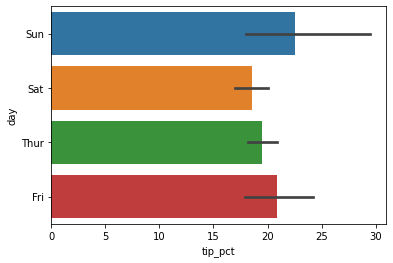

In [41]:
sns.barplot(x='tip_pct', y='day', data=tips, orient="h")
plt.show()

Se puede observar que los dias en los que el porcentaje de propinas es mayor es en Domingo, seguido por Viernes.

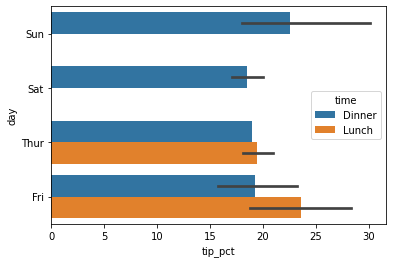

In [42]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')
plt.show()
sns.set(style="darkgrid")

Al agregar en el grafico la distincion por el horario 'time', se observa que los viernes y sabados se deja un mayor porcentaje de propina durante la comida 'lunch'.

### Exploracion de bivariables con scatterplot

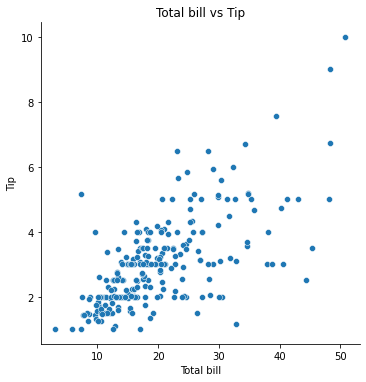

In [19]:
scatter_tips = sns.relplot(x="total_bill", y="tip", data=tips)
plt.title('Total bill vs Tip')
plt.ylabel('Tip')
plt.xlabel('Total bill')
plt.show()

In [9]:
np.corrcoef(tips['total_bill'],tips['tip'])

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

Se puede observar que las variables tienen una relacion lineal positiva de 0.67, sin embargo algunos de los puntos se encuentran dispersos con respecto a esta tendencia. 


### 3 variables: 2 variables numericas y 1 categorica

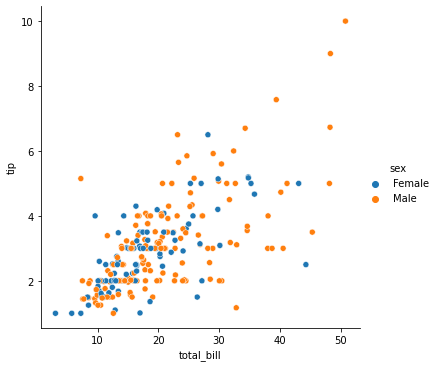

In [4]:
sns.relplot(x="total_bill", y="tip", hue="sex",
            data=tips);

### Exploracion de variables con matrix plot

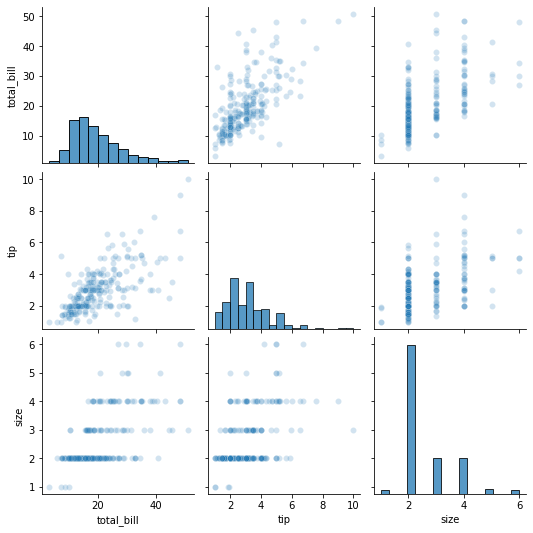

In [21]:
# Matrix Plot
sns.pairplot(tips, diag_kind='hist', plot_kws={'alpha': 0.2})

### Una variable: 1 numerica 

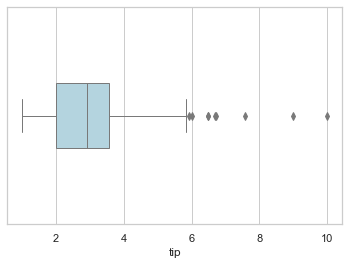

In [50]:
sns.set(style="whitegrid")
ax = sns.boxplot(x = tips['tip'], color='lightblue', fliersize=5, orient='v', linewidth=1, width=0.3)

Se puede observar en el anterio boxplot que la mediana se encuentra en 3, y que tenemos algunos valores atipicos que se encuentran fuera del conjunto de datos. 

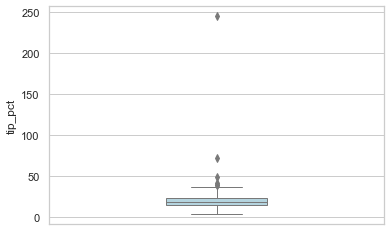

In [52]:
sns.boxplot(y="tip_pct", data=tips[tips.tip < 10],  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3);

En el boxplot con la variable del procentaje de propina, se observa que el valor maximo dista considerablemente de la mediana, siendo el maximo 245 y la mediana 20. Se puede observar tambien que el porcentaje de propina que dejan la mayoria de los comensales se encuentra muy cerca de la mediana. 

### Dos variables: 1 categorica + 1 numerica 

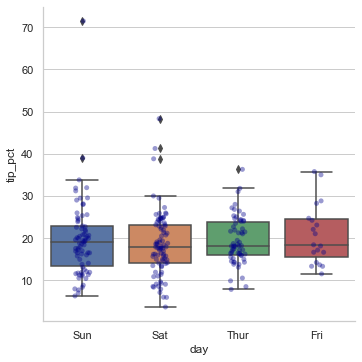

In [54]:
## añadimos variable categorica 'day' en x:
ax = sns.catplot(x='day', y='tip_pct', kind='box',
                 data=tips[tips.tip_pct < 245]);

ax = sns.stripplot(x='day', y='tip_pct', data=tips[tips.tip_pct < 245], orient='v', color='darkblue', alpha= 0.4);

Se observa en el grafico que la mediana del porcentaje de propinas es similar entre los diferentes dias de la semana registrados. Teniendo algunos datos atipicos de propinas mayores en domingos y sabados. Tambien con los puntos de los datos se observa la agrupacion de la mayoria de las propinas muy cercana de la mediana.

### 3 variables: 2 categoricas + 1 numerica

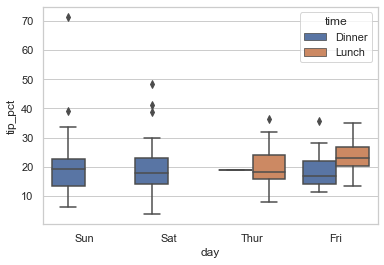

In [55]:
sns.boxplot(x='day', y='tip_pct', hue='time', 
               data=tips[tips.tip_pct < 245]);

El valor diferente que se puede observar con este grafico es que la media de las propinas en el Lunch del viernes es mayor que el resto de los dias y de los horarios.

### Añadiendo mas variables:

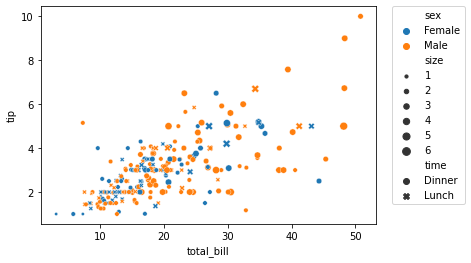

In [14]:
scatter_2 = sns.scatterplot(x='total_bill', y='tip', hue = 'sex', style  = 'time', size='size',sizes=(10, 60), data=tips)
scatter_2.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0.)

### Facet Grids y Categorical DataFrame
Nos permite profundizar todavía más en el analysis, añadiendo una variable categórica adicional.

Usando el método factorplot( ) de "Facet Grid" :

Cuatro Variables : 3 Categoricas = ('day', 'time', 'smoker'), 1 Numérica = 'tip_pct'

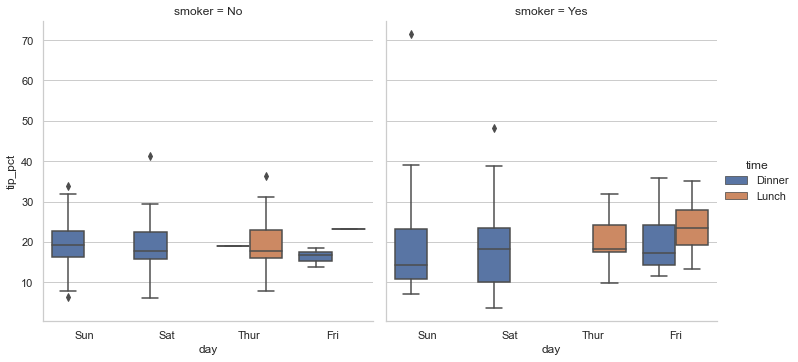

In [57]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='box', data=tips[tips.tip_pct < 245]);

De la grafica anterior se puede decir que los *NO* fumadores dejan una propina similar con variaciones pequeñas en la media, mientras que los fumadores dejan una propina con mayor dispersion. Acerca de los fumadores se pueden hacer las siguientes observaciones: 
- dejan una propina menor a la media los domingos
- los viernes suelen dejar propina y un porcentaje mayor que la media durante la comida.

### Exploracion de variables con histogramas

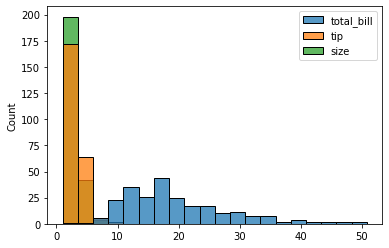

In [15]:
histogram1 = sns.histplot(data=tips)

Se puede observar que la variable total_bill tiene una distribucion bimodal normal, mientras que las variables tip y size son unimodales. 

## Nivel 2
### - Ejercicio 2
Repite el ejercicio 1 con el dataset que disponemos en el repositorio de GitHub PRE-PROCESSING-FECHA , movies.dat

In [4]:
mcabecera = ['movie_id', 'titulo', 'genero']
mcabecera
movies = pd.read_table('movies.dat', sep = '::', header = None, names = mcabecera)

Evaluacion preliminar del dataset, tipo de datos, forma, index de las columnas, valores na, etc.

In [5]:
movies.ndim

2

In [6]:
movies.columns

Index(['movie_id', 'titulo', 'genero'], dtype='object')

In [7]:
movies.shape

(3883, 3)

In [8]:
movies.isnull().sum()

movie_id    0
titulo      0
genero      0
dtype: int64

In [9]:
movies.isna().sum()

movie_id    0
titulo      0
genero      0
dtype: int64

In [10]:
movies.describe()

,movie_id
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


In [11]:
movies.head()

,movie_id,titulo,genero
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


Ahora se extrae informacion a columnas adicionales para el analisis:

In [12]:
# Se dividen los generos y se crea una nueva columna con los generos separados
s = movies['genero'].str.split('|').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genero'
del movies['genero']
movies_modificado = movies.join(s)

In [13]:
#extraer año de la columna de titulo y guardar en una nueva columna
movies_modificado['year'] = [x[-5:-1] for x in movies_modificado['titulo']]
#la columna se extrae como objeto y ahora se va a convertir a int
movies_modificado['year'] = pd.to_numeric(movies_modificado['year'])

In [14]:
movies_modificado.head()

,movie_id,titulo,genero,year
0,1,Toy Story (1995),Animation,1995
0,1,Toy Story (1995),Children's,1995
0,1,Toy Story (1995),Comedy,1995
1,2,Jumanji (1995),Adventure,1995
1,2,Jumanji (1995),Children's,1995


In [15]:
movies_modificado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6408 entries, 0 to 3882
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  6408 non-null   int64 
 1   titulo    6408 non-null   object
 2   genero    6408 non-null   object
 3   year      6408 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 250.3+ KB


Se obtiene un resumen estadistico de las columnas del dataset:

In [16]:
movies_modificado.describe(include='all')

,movie_id,titulo,genero,year
count,6408.000000,6408,6408,6408.000000
unique,NaN,3883,18,NaN
top,NaN,"Transformers: The Movie, The (1986)",Drama,NaN
freq,NaN,6,1603,NaN
mean,1949.873283,NaN,NaN,1986.195225
std,1136.449312,NaN,NaN,16.516078
min,1.000000,NaN,NaN,1919.000000
25%,977.750000,NaN,NaN,1983.000000
50%,1962.500000,NaN,NaN,1994.000000
75%,2911.250000,NaN,NaN,1997.000000


### Visualizacion


En la siguiente grafica de cajas con una variable numerica, se observa que se concentra la produccion de peliculas entre 1980-2000.

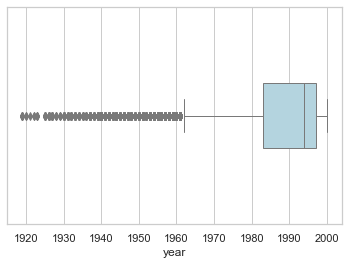

In [51]:
sns.set(style="whitegrid")
ax = sns.boxplot(x = movies_modificado['year'], color='lightblue', fliersize=5, orient='v', linewidth=1, width=0.3)

In [102]:
#movies_modificado.loc[movies_modificado['genero'] == 'Film-Noir']

Al agregar una variable categorica en el boxplot se puede observar las peliculas realizadas por genero y en que año. Se observa que por ejemplo, el genero de documentales se ha realizado mas en los años entre 1995-2000, mientras que generos como 'film-noir' y los 'musicales' se encuentran mas dispersos en el tiempo. 

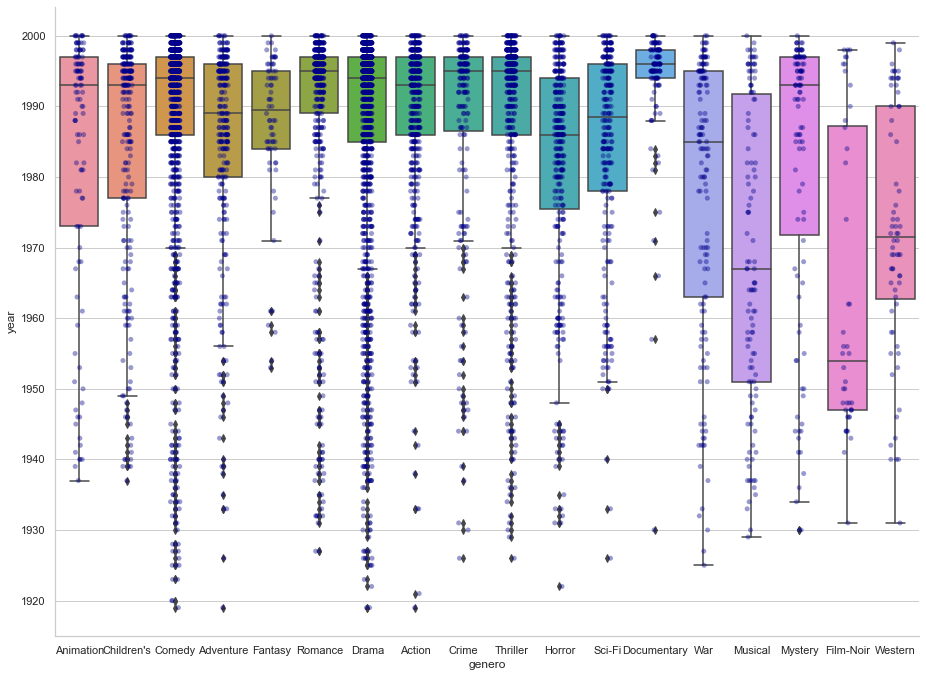

In [97]:
## añadimos variable categorica 'genero' en x:
fig_mov=sns.catplot(x='genero', y='year', kind='box', data=movies_modificado)
fig_mov= sns.stripplot(x='genero', y='year', data=movies_modificado, orient='v', color='darkblue', alpha= 0.4, )
#cambiando el tamaño para ajustar los generos en x
fig_mov = plt.gcf()
fig_mov.set_size_inches( 15, 10)

Se genera un histograma de la variable año para observar la distribucion en el tiempo de las peliculas. Se observa que entre 1995-2000 se concentra la produccion de peliculas.

<AxesSubplot:xlabel='year', ylabel='Count'>

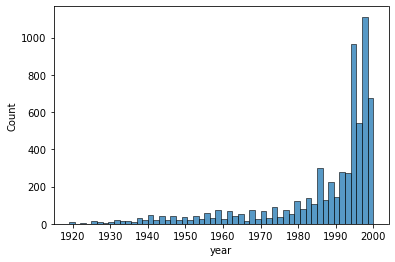

In [29]:
sns.histplot(x='year', data=movies_modificado)

## Nivel 3
### - Ejercicio 3
En este ejercicio no le daremos muchas indicaciones porque queremos que nos muestre su creatividad. Sorpréndeme con gráficas e interpretaciones del dataset " movies.dat " del ejercicio anterior.

En la siguiente figura se puede observar que los generos en los que se producen una mayor cantidad de peliculas son: comedia y drama. Mientras que las peliculas "film-noir" son las que menos se producen.

<AxesSubplot:xlabel='genero', ylabel='Count'>

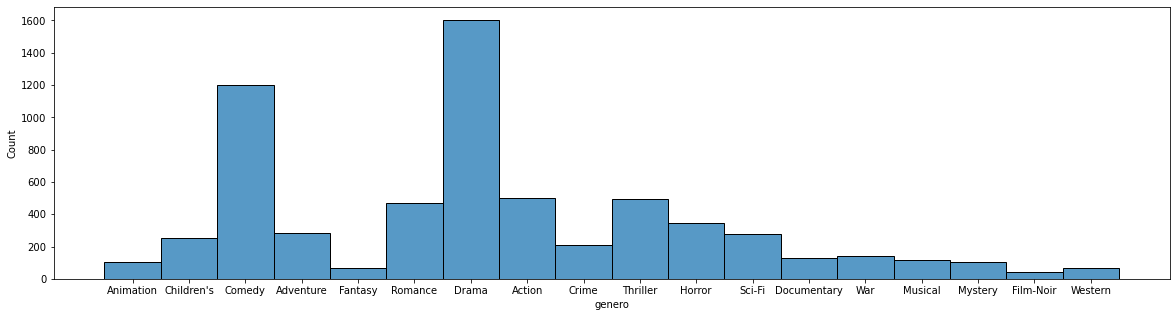

In [43]:
plt.figure(figsize=(20, 5))
sns.histplot(x= 'genero', data=movies_modificado, )

#plt.hist(x='genero', data=movies_modificado )

En el siguiente heatmap, se observa que en 1920 la produccion de peliculas se concentraba en generos como comedia, drama, accion y aventura, mientras que entre 1990-2000 se han generado peliculas en un abanico mas amplio de generos. Siendo los generos de comedia y drama los que tienen mayor proliferacion. 

<AxesSubplot:xlabel='year', ylabel='genero'>

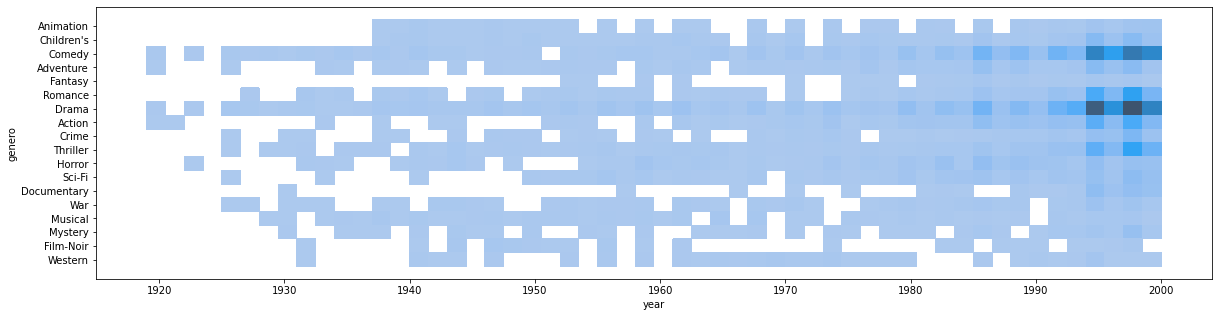

In [47]:
plt.figure(figsize=(20, 5))
sns.histplot(x='year', y='genero', data=movies_modificado)
